# Imports

Zona em que são definidos os imports necessários.

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import json
import re
import numpy as np
import random
import spacy
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import chunk
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
from gensim.models import HdpModel
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import collections
import unicodedata
import pandas as pd
from operator import itemgetter

# Funções auxiliares

Funções que são utilizadas ao longo do código.

Função que ordena um dicionário descendentemente de acordo com os seus values.

In [2]:
def sort_dict(dictionary):
    sorted_dict = sorted(dictionary.items(), key=lambda item: item[1], reverse=True)
    sorted_dict = collections.OrderedDict(sorted_dict)
    sorted_dict = dict(sorted_dict)
    return sorted_dict

Função que devolve uma lista com as palavras dos tópicos.

In [3]:
def words_per_topic(topics):
    topics_list = []
    for topicid, topic in topics:
        words_per_topic = []
        for word, weight in topic:
            words_per_topic.append(word)
        topics_list.append(words_per_topic)
    return topics_list

Função que devolve uma lista dicionários de das palavras e pesos por tópicos tópicos.

In [4]:
def words_weigths_per_topic(topics):
    topics_list = []
    for topicid, topic in topics:
        words_weigths_per_topic = {}
        for word, weight in topic:
            words_weigths_per_topic.update({word:weight})
        topics_list.append(words_weigths_per_topic)
    return topics_list

Função que devolve um dicionário com o key igual ao id do topico e o value como o nome do topico.
Baseia-se a partir dos ficheiros/bibliotecas importados. Para cada ficheiro/biblioteca é criado um incrementador, é verificado quantas palavras de cada tópico existem, e para cada palavra igual, incrementa o peso associado.
No final verifica qual é o nome do tópico que tem maior número de incremetador e adiciona a um dicionário o id desse tópico e o respectivo nome.
É possivel verificar com maior detalhe o funcionamento desta função de busca, descomentando o que está comentado.

In [5]:
def define_topics_names(words_weigths_per_topic, books_words_list, cars_words_list, computers_words_list, cookware_words_list, hotels_words_list, movies_words_list, music_words_list, phones_words_list):
    topics_weight = {}
    id_topics_weight = {}
    id_topic = -1
    for topics in words_weigths_per_topic:
        id_topic += 1
        #print("Palavras do tópico {}:".format(id_topic))
        #print(topics)
        books_weight = 0
        cars_weight = 0
        computers_weight = 0
        cookware_weight = 0
        hotels_weight = 0
        movies_weight = 0
        music_weight = 0
        phones_weight = 0
        for word_in_topic, weight_in_topic in topics.items():
            for word_books_list in books_words_list:
                if word_in_topic == word_books_list:
                    books_weight += abs(weight_in_topic)
                    #print("Para a biblioteca Books encontrou as palavras: " + str(word_in_topic))
            for word_cars_list in cars_words_list:
                if word_in_topic == word_cars_list:
                    cars_weight += abs(weight_in_topic)
                    #print("Para a biblioteca Cars encontrou as palavras: " + str(word_cars_list))
            for word_computers_list in computers_words_list:
                if word_in_topic == word_computers_list:
                    computers_weight += abs(weight_in_topic)
                    #print("Para a biblioteca Computers encontrou as palavras: " + str(word_computers_list))
            for word_cookware_list in cookware_words_list:
                if word_in_topic == word_cookware_list:
                    cookware_weight += abs(weight_in_topic)
                    #print("Para a biblioteca Cookware encontrou as palavras: " + str(word_cookware_list))
            for word_hotels_list in hotels_words_list:
                if word_in_topic == word_hotels_list:
                    hotels_weight += abs(weight_in_topic)
                    #print("Para a biblioteca Hotels encontrou as palavras: " + str(word_hotels_list))
            for word_movies_list in movies_words_list:
                if word_in_topic == word_movies_list:
                    movies_weight += abs(weight_in_topic)
                    #print("Para a biblioteca Movies encontrou as palavras: " + str(word_movies_list))
            for word_music_list in music_words_list:
                if word_in_topic == word_music_list:
                    music_weight += abs(weight_in_topic)
                    #print("Para a biblioteca Music encontrou as palavras: " + str(word_music_list))
            for word_phones_list in phones_words_list:
                if word_in_topic == word_phones_list:
                    phones_weight += abs(weight_in_topic)
                    #print("Para a biblioteca Phones encontrou as palavras: " + str(word_phones_list))
                    
                      
        topics_weight = {'Books':books_weight, 'Cars':cars_weight, 'Computers':computers_weight, 'Cookware':cookware_weight, 'Hotels':hotels_weight, 'Movies':movies_weight, 'Music':music_weight, 'Phones':phones_weight}
        sorted_topics_weight = sort_dict(topics_weight)
        id_topics_weight.update({id_topic:sorted_topics_weight})
    #print(id_topics_weight)
    #print("")
    
    final_dict = {}
    for key, value in id_topics_weight.items():
        id_topic = key
        iterate_items = 0
        for topic, weight in value.items():
            if iterate_items == 0:
                topic_name_1 = topic
                max_value_1 = weight
            if iterate_items == 1:
                if max_value_1 == weight:
                    topic_name_2 = topic
                    max_value_2 = weight
                    topics_names = str(topic_name_1) + ", " + str(topic_name_2)
                    final_dict.update({id_topic:topics_names})
                else:
                    final_dict.update({id_topic:topic_name_1})
                if max_value_1 == 0:
                    final_dict.update({id_topic:"???"})
            iterate_items += 1
    #print(final_dict)
    #print("")
    return final_dict

# Importação dos dados

Importação dos dados para um dicionário.
Visualização das keys dos mesmos.
Criação de uma lista apenas com "text".
É excluido "recommended" porque não nos interessa.
Não é realizado o baralhamento dos mesmos porque na inferência é necessário verificar manualmente a que tópicos correspondem.

In [6]:
dataset = []
for review in open("../TM/data/en/SFU_Review_Corpus.json", "r"):
    dataset.append(json.loads(review))
print(dataset[0].keys())

reviews = []
for review in dataset:
    reviews.append(review["text"])
    
print("Existem " + str(len(reviews)) + " reviews")

dict_keys(['text', 'recommended'])
Existem 400 reviews


# Importação dos ficheiros

Importação dos ficheiros/bibliotecas com as palarvas mais relacionadas com os tópicos.

## Books

In [7]:
books_words_list = []
with open('../TM_Trabalho_2/Topics/books.csv', encoding='ISO-8859-1') as csvfile:
    for row in csvfile:
        row = re.sub("[\n]", "", row)
        books_words_list.append(row)

## Cars

In [8]:
cars_words_list = []
with open('../TM_Trabalho_2/Topics/cars.csv', encoding='ISO-8859-1') as csvfile:
    for row in csvfile:
        row = re.sub("[\n]", "", row)
        cars_words_list.append(row)

## Computers

In [9]:
computers_words_list = []
with open('../TM_Trabalho_2/Topics/computers.csv', encoding='ISO-8859-1') as csvfile:
    for row in csvfile:
        row = re.sub("[\n]", "", row)
        computers_words_list.append(row)

## Cookware

In [10]:
cookware_words_list = []
with open('../TM_Trabalho_2/Topics/cookware.csv', encoding='ISO-8859-1') as csvfile:
    for row in csvfile:
        row = re.sub("[\n]", "", row)
        cookware_words_list.append(row)

## Hotels

In [11]:
hotels_words_list = []
with open('../TM_Trabalho_2/Topics/hotels.csv', encoding='ISO-8859-1') as csvfile:
    for row in csvfile:
        row = re.sub("[\n]", "", row)
        hotels_words_list.append(row)

## Movies

In [12]:
movies_words_list = []
with open('../TM_Trabalho_2/Topics/movies.csv', encoding='ISO-8859-1') as csvfile:
    for row in csvfile:
        row = re.sub("[\n]", "", row)
        movies_words_list.append(row)

## Musics

In [13]:
music_words_list = []
with open('../TM_Trabalho_2/Topics/musics.csv', encoding='ISO-8859-1') as csvfile:
    for row in csvfile:
        row = re.sub("[\n]", "", row)
        music_words_list.append(row)

## Phones

In [14]:
phones_words_list = []
with open('../TM_Trabalho_2/Topics/phones.csv', encoding='ISO-8859-1') as csvfile:
    for row in csvfile:
        row = re.sub("[\n]", "", row)
        phones_words_list.append(row)

# Remoção da pontuação

Função que remove a pontuação.

In [15]:
def punctuation_treatment(review):
    review = re.sub(r"[^\w\s]|_", " ", review)
    review = re.sub("[\n\r]", " ", review)
    review = re.sub("_"," ", review)
    review = re.sub(" +"," ",review)
    review = re.sub(" +$","",review)
    review = re.sub("^ +","",review)
    return review

# Minúsculas

Função que altera todos os caracteres da review para minúsculas.

In [16]:
def lower_case_treatment(review):
    return review.lower()

# Stop words

Função que remove as stop words.

In [17]:
def stop_words_treatment(review):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(review)
    correct_review = [] 
    for word in words: 
        if word not in stop_words: 
            correct_review.append(word)
    return " ".join(correct_review)

# Números

Função que remove todos os números.

In [18]:
def numbers_treatment(review):
    review = re.sub(r"[0-9]", "", review)
    return review

# Números cardinais e ordinais

Função que remove todos os números cardinais e ordinais.

In [19]:
def cardinal_ordinal_numbers_treatment(review):
    review = re.sub(r"\b((?i)(one|two|three|four|five|six|seven|eight|nine|ten|eleven|twelve|thirteen|fourteen|fifteen|sixteen|seventeen|eighteen|nineteen|twenty|thirty|forty|fifty|sixty|seventy|eighty|ninety|first|second|third|fourth|fifth|sixth|seventh|eighth|ninth|tenth))\b", "", review)
    return review

# Um Caracter

Função que remove todas as palavras com apenas 1 caracter.

In [20]:
def one_character_treatment(review):
    review = re.sub(r"(?<!\S).(?!\S)\s*", "", review)
    return review

# Lemmatization

In [21]:
def lemmatizer_treatment(review):
    lemmatizer = WordNetLemmatizer()
    lemmatizer_list = [lemmatizer.lemmatize(word) for word in review.split()]
    new_text = " ".join(lemmatizer_list)
    return new_text

# POS tagging

Apenas guarda os Nomes.

In [22]:
def pos_treatment(review):
    words = word_tokenize(review)
    pos_tag_text = nltk.pos_tag(words)
    review = " ".join([word[0] for word in pos_tag_text if word[1] in ['NN', 'NNS', 'NNP', 'NNPS']])
    return review

# Noun Phrase Chunking

In [23]:
def chunking_treatment(review):
    nlp = spacy.load("en_core_web_sm")
    review = " ".join(word.text for word in nlp(review).noun_chunks)
    return review

# Tratamento dos dados

Função para o tratamento dos dados.


In [24]:
def data_treatment(review, with_lower_case, with_lemmatizer, with_pos, with_chuncking):
    if with_lower_case:
        review = lower_case_treatment(review)
    review = numbers_treatment(review)
    review = cardinal_ordinal_numbers_treatment(review)
    review = punctuation_treatment(review)
    review = one_character_treatment(review)
    review = stop_words_treatment(review)
    if with_lemmatizer:
        review = lemmatizer_treatment(review)
    if with_chuncking:   
        review = chunking_treatment(review)
    if with_pos:
        review = pos_treatment(review)
    return review

# Preparação dos dados

Tratamento das reviews e divisão de dados em 10 reviews para inferência de tópicos e os restantes para treino.

Nesta fase o tratamento dos dados irá se basear em:

- Converter todas as palavras para minúsculas;
- Remover todos os números;
- Remover todos os números cardinais e ordinais;
- Remover toda a pontuação;
- Remover todas as palavras com apenas 1 caracter;
- Remover todas stop words.

Neste caso não é realizado o tratamento das minúsculas e portanto nesta fase iremos obter piores resultados porque as palavras nos ficheiros/bibliotecas estão em minúsculas, logo não encontra essas palavras.

In [25]:
train_list = [data_treatment(review, True, False, False, False).split() for review in reviews[10:]]
test_list = [data_treatment(review, True, False, False, False).split() for review in reviews[:10]]

print(str(len(train_list)) + " documentos para treino")
print(str(len(test_list)) + " documentos para teste")

390 documentos para treino
10 documentos para teste


# Document-Term Matrix

Construção da matriz de documentos por termos necessária à construção dos modelos de tópicos.
Modelos com 8 tópicos e 15 palavras por tópico.

In [26]:
dictionary = corpora.Dictionary(train_list)
doc_term_matrix = [dictionary.doc2bow(review) for review in train_list]
topics = ["Books", "Cars", "Computers", "Cookware", "Hotels", "Movies", "Music", "Phones"]

num_of_words = 15
num_of_topics = len(topics)
passes_lda = 40

Função para visualizar o resultado dos modelos, por tópico e respectivas palavras e pesos.

In [27]:
def view_topics(topics):
    list_of_topics_names = []
    list_of_words_per_topic = words_weigths_per_topic(topics)
    names_topics_dict = define_topics_names(list_of_words_per_topic, books_words_list, cars_words_list, computers_words_list, cookware_words_list, hotels_words_list, movies_words_list, music_words_list, phones_words_list)
    for id_topic, words in topics:
        words_weights = {}
        for word, weight in words:
            words_weights.update({word: weight})
        words_by_topic = ""
        iterator = 1
        for key, value in words_weights.items():
            if iterator < num_of_words:
                    words_by_topic = words_by_topic + "'" + str(key) + "'" + ":" + str(value) + ", "
            else:
                words_by_topic = words_by_topic + "'" + str(key) + "'" + ":" + str(value)
            iterator+=1
        for identifier, name in names_topics_dict.items():
            if id_topic == identifier:
                name_of_topic = name
        print("Topico: {} -> Palavras e pesos = {}\n".format(name_of_topic, words_by_topic))
        list_of_topics_names.append(name_of_topic)
    
    return list_of_topics_names

# Construção dos modelos de tópicos

Modelos com 8 tópicos e 15 palavras por tópico.

### LSA

In [28]:
def create_lsa(doc_term_matrix, dictionary, num_of_topics):
    lsa = gensim.models.lsimodel.LsiModel
    lsamodel = lsa(doc_term_matrix, num_topics = num_of_topics, id2word = dictionary)
    return lsamodel

In [29]:
lsamodel = create_lsa(doc_term_matrix, dictionary, num_of_topics)
lsa_topics = lsamodel.show_topics(num_topics = num_of_topics, num_words = num_of_words, formatted=False)
view_topics(lsa_topics)

Topico: Computers -> Palavras e pesos = 'like':0.2405021262884673, 'car':0.2252304643919244, 'also':0.17604853333436205, 'would':0.1592805482554067, 'get':0.15250152996284425, 'even':0.1291936318626981, 'imac':0.12074211451420663, 'good':0.12040740152598797, 'much':0.11944355588636, 'well':0.11853546625431016, 'time':0.11477806914466036, 'dell':0.1063291716176804, 'new':0.10428272171587713, 'really':0.10336641889782588, 'system':0.10286061489447614

Topico: Computers -> Palavras e pesos = 'car':-0.4359802108031394, 'imac':0.26379140357803865, 'dell':0.2131531562841011, 'mac':0.2094866232692194, 'pc':0.1814001286493412, 'apple':0.17013418846335018, 'computer':0.13953661705087156, 'rear':-0.11256032621897889, 'photos':0.10911196199889785, 'applications':0.10516112004972153, 'seat':-0.10498120350430122, 'mail':0.10156661512687708, 'iphoto':0.1000209516204644, 'mouse':0.09774813369576177, 'engine':-0.09447243223196863

Topico: Music -> Palavras e pesos = 'car':0.3343736789199912, 'track':-

['Computers',
 'Computers',
 'Music',
 'Computers',
 'Cookware',
 'Cookware',
 'Phones',
 'Movies']

### LDA

In [30]:
def create_lda(doc_term_matrix, dictionary, num_of_topics):
    lda = gensim.models.ldamodel.LdaModel
    ldamodel = lda(doc_term_matrix, num_topics = num_of_topics, id2word = dictionary, passes = passes_lda)
    return ldamodel

In [31]:
ldamodel = create_lda(doc_term_matrix, dictionary, num_of_topics)
lda_topics = ldamodel.show_topics(num_topics = num_of_topics, num_words = num_of_words, formatted=False)
view_topics(lda_topics)

Topico: Computers -> Palavras e pesos = 'computer':0.009540813, 'apple':0.0069972207, 'dell':0.0065722964, 'imac':0.006156721, 'system':0.005296183, 'also':0.0052266587, 'like':0.0050522797, 'pc':0.004971988, 'drive':0.004683175, 'new':0.0046688044, 'mac':0.00450365, 'machine':0.0043331212, 'get':0.004330745, 'would':0.0043129795, 'dvd':0.0041261176

Topico: Cookware -> Palavras e pesos = 'pan':0.01248899, 'pans':0.012455554, 'stainless':0.011102913, 'cookware':0.0106142275, 'clad':0.0102039315, 'set':0.0097349435, 'steel':0.0095555335, 'use':0.009151501, 'heat':0.0058786166, 'like':0.0055310996, 'non':0.0049639014, 'pots':0.0049057654, 'stick':0.0048664366, 'dishwasher':0.004740795, 'pot':0.0045700264

Topico: Cars -> Palavras e pesos = 'car':0.014513536, 'like':0.0066421744, 'cl':0.004949842, 'type':0.004581522, 'bmw':0.0044056135, 'also':0.004076486, 'engine':0.0036272104, 'acura':0.0036132669, 'drive':0.0035161169, 'much':0.0034330443, 'driver':0.0033464686, 'would':0.0033020542, '

['Computers',
 'Cookware',
 'Cars',
 'Cars',
 'Phones',
 'Movies',
 'Hotels',
 'Music']

# Os 3 tópicos mais importantes por modelo

Funções que devolvem uma lista com os 3 tópicos mais importantes por modelo.

### LSA

Devolve os 3 primeiros tópicos.

In [32]:
def get_3_topics_most_important_lsa(lsa_topics):
    count_most_important_topics = 0
    topics_most_important_list = []
    for topic, words in lsa_topics:
        topics_most_important_list.append(topic)
        count_most_important_topics += 1
        if count_most_important_topics == 3:
            break
            
    return topics_most_important_list

### LDA

Devolve os 3 tópicos mais importantes, i.e., os tópicos com maiores pesos por documentos.

In [33]:
def get_3_topics_most_important_lda(ldamodel):
    increment_0 = 0
    increment_1 = 0
    increment_2 = 0
    increment_3 = 0
    increment_4 = 0
    increment_5 = 0
    increment_6 = 0
    increment_7 = 0
    increments_dict = {}
    
    for doc in doc_term_matrix:
        dict_topics = {}
        if len(ldamodel[doc]) > 1:
            for topic, weight in ldamodel[doc]:
                dict_topics.update({topic:weight})
            dict_topics = sort_dict(dict_topics)
            topic_most_important = next(iter(dict_topics))
            
            if topic_most_important == 0:
                increment_0 += 1
            if topic_most_important == 1:
                increment_1 += 1
            if topic_most_important == 2:
                increment_2 += 1
            if topic_most_important == 3:
                increment_3 += 1
            if topic_most_important == 4:
                increment_4 += 1
            if topic_most_important == 5:
                increment_5 += 1
            if topic_most_important == 6:
                increment_6 += 1
            if topic_most_important == 7:
                increment_7 += 1
                
    increments_dict = {0:increment_0, 1:increment_1, 2:increment_2, 3:increment_3, 4:increment_4, 5:increment_5, 6:increment_6, 7:increment_7}
    increments_dict = sort_dict(increments_dict)
    topics_most_important_list = []
    count_most_important_topics = 0
    for key in increments_dict:
        topics_most_important_list.append(key)
        count_most_important_topics += 1
        if count_most_important_topics == 3:
            break
            
    return topics_most_important_list

# Word Cloud

Funções para a criação da Word Cloud de acordo com o modelo dado como parâmetro.

In [34]:
def get_words_and_weights(most_important_topics, topics):
    wordcloud_topics = {}
    for most_important in most_important_topics:
        for topic in topics:
            if most_important == topic[0]:
                for weight in topic[1]:
                    if weight[0] in wordcloud_topics:
                        wordcloud_topics[weight[0]] = max(wordcloud_topics[weight[0]], abs(weight[1]))
                    else:
                        wordcloud_topics[weight[0]] = abs(weight[1])                  
    return wordcloud_topics


def create_word_cloud(model):
    wordCloud = WordCloud(background_color="white")
    if model == "lsa":
        most_important_topics = get_3_topics_most_important_lsa(lsa_topics)
        wordcloud_topics = get_words_and_weights(most_important_topics, lsa_topics)
    if model == "lda":
        most_important_topics = get_3_topics_most_important_lda(ldamodel)
        wordcloud_topics = get_words_and_weights(most_important_topics, lda_topics)
    wordCloud.generate_from_frequencies(wordcloud_topics)
    plt.figure()
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.show()

### LSA - Word Cloud

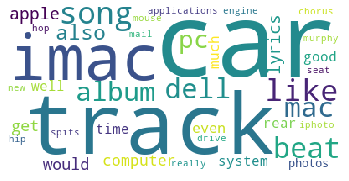

In [35]:
create_word_cloud("lsa")

### LDA - Word Cloud

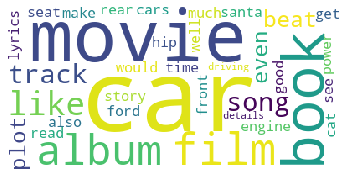

In [36]:
create_word_cloud("lda")

# Número de tópicos variados

Para cada modelo iremos testar com 3, 8 e 13 tópicos.

### Métricas LSA

In [37]:
def lsa_num_topics(num_topics):
    lsamodel = create_lsa(doc_term_matrix, dictionary, num_topics)
    lsamodel_topics = lsamodel.show_topics(num_topics=num_topics, num_words=num_of_words, formatted=False)
    topics_list = words_per_topic(lsamodel_topics)
    lsamodel_coherence = CoherenceModel(topics=topics_list, texts=train_list, dictionary=dictionary, coherence='c_v').get_coherence()
    print("LSA com {} tópicos: {}".format(num_topics, lsamodel_coherence))
    
    return lsamodel_topics, lsamodel_coherence

In [38]:
print("Coherence\n")
lsamodel_3_topics, lsamodel_3_coherence = lsa_num_topics(3)
lsamodel_8_topics,lsamodel_8_coherence = lsa_num_topics(8)
lsamodel_13_topics, lsamodel_13_coherence = lsa_num_topics(13)

Coherence

LSA com 3 tópicos: 0.3558812801827133
LSA com 8 tópicos: 0.3331597250608737
LSA com 13 tópicos: 0.3867826298179698


#### LSA com 3 tópicos

In [39]:
view_topics(lsamodel_3_topics)

Topico: Computers -> Palavras e pesos = 'like':0.24050266909995796, 'car':0.22523053910504878, 'also':0.17604889214413214, 'would':0.15927907834722715, 'get':0.15250153850286227, 'even':0.12919278549564944, 'imac':0.12074306023385563, 'good':0.1204064112793116, 'much':0.11944338226102952, 'well':0.11853506457531889, 'time':0.11477937964131828, 'dell':0.106329303636167, 'new':0.10428459343496442, 'really':0.10336732440687982, 'system':0.10285883742908544

Topico: Computers -> Palavras e pesos = 'car':-0.435978952554661, 'imac':0.26379198638156065, 'dell':0.21314763699613534, 'mac':0.20948651245227196, 'pc':0.18137229473966934, 'apple':0.17012249713741662, 'computer':0.13952166315419376, 'rear':-0.11255781402746959, 'photos':0.10910958904534533, 'applications':0.10516695767070038, 'seat':-0.10499994532840715, 'mail':0.10156750430229237, 'iphoto':0.10002117530228768, 'mouse':0.0977453518311236, 'engine':-0.09448074922552231

Topico: Music -> Palavras e pesos = 'car':-0.33438100498976014, 

['Computers', 'Computers', 'Music']

#### LSA com 13 tópicos

In [40]:
view_topics(lsamodel_13_topics)

Topico: Computers -> Palavras e pesos = 'like':0.2405030660927398, 'car':0.22523048375270552, 'also':0.17604938362503766, 'would':0.15927977328012718, 'get':0.1525006318105525, 'even':0.1291928512176498, 'imac':0.12074129272719156, 'good':0.12040711407419989, 'much':0.11944498791392248, 'well':0.11853636714039206, 'time':0.11477748318052816, 'dell':0.10632897375903427, 'new':0.10428249835817333, 'really':0.10336693395594683, 'system':0.10286058390831579

Topico: Computers -> Palavras e pesos = 'car':-0.4359797358252071, 'imac':0.26378766433070994, 'dell':0.21315272376535566, 'mac':0.209486991351017, 'pc':0.18138613325041614, 'apple':0.17013037039628703, 'computer':0.13952196521574017, 'rear':-0.1125577015492235, 'photos':0.10911161978149167, 'applications':0.1051658709648525, 'seat':-0.10499755350614988, 'mail':0.10156756245226474, 'iphoto':0.10002115655334835, 'mouse':0.09773705162776254, 'engine':-0.0944739759463011

Topico: Music -> Palavras e pesos = 'car':-0.3343783976423928, 'tra

['Computers',
 'Computers',
 'Music',
 'Computers',
 'Cookware',
 'Cookware',
 'Phones',
 'Movies',
 'Music',
 'Computers',
 'Cars',
 'Books',
 'Cars']

### Métricas LDA

In [41]:
def lda_num_topics(num_topics):
    ldamodel = create_lda(doc_term_matrix, dictionary, num_topics)
    ldamodel_topics = ldamodel.show_topics(num_topics=num_topics, num_words=num_of_words, formatted=False)
    topics_list = words_per_topic(ldamodel_topics)
    ldamodel_coherence = CoherenceModel(topics=topics_list, texts=train_list, dictionary=dictionary, coherence='c_v').get_coherence()
    print("LDA com {} tópicos\n".format(num_topics))
    print("Perplexity: {}".format(ldamodel.log_perplexity(doc_term_matrix)))
    print("Bound: {}".format(ldamodel.bound(doc_term_matrix)))
    print("Coherence: {}\n".format(ldamodel_coherence))
    
    return ldamodel_topics, ldamodel_coherence

In [42]:
ldamodel_3_topics, ldamodel_3_coherence = lda_num_topics(3)
ldamodel_8_topics, ldamodel_8_coherence = lda_num_topics(8)
ldamodel_13_topics, ldamodel_13_coherence = lda_num_topics(13)

LDA com 3 tópicos

Perplexity: -8.368466809638557
Bound: -1150505.1829820871
Coherence: 0.2737542596561644

LDA com 8 tópicos

Perplexity: -8.364402462414237
Bound: -1149946.421697557
Coherence: 0.481575804577855

LDA com 13 tópicos

Perplexity: -8.41331371920079
Bound: -1156670.792320609
Coherence: 0.4560876713912937



#### LDA com 3 tópicos

In [43]:
view_topics(ldamodel_3_topics)

Topico: Music -> Palavras e pesos = 'like':0.0060561826, 'album':0.0045450847, 'room':0.0044886614, 'track':0.0044678273, 'time':0.0042824387, 'song':0.0041543506, 'hotel':0.004070792, 'would':0.0038838845, 'get':0.0036312873, 'good':0.0034325863, 'book':0.0033611122, 'beat':0.0031814128, 'even':0.003126791, 'also':0.0030614126, 'well':0.0029572695

Topico: Computers -> Palavras e pesos = 'phone':0.006444511, 'like':0.0055465745, 'use':0.005302512, 'computer':0.004978966, 'also':0.004844573, 'system':0.0044922284, 'would':0.0041941525, 'get':0.003963333, 'apple':0.0036358952, 'new':0.0034996415, 'dell':0.00341616, 'even':0.0033593406, 'pan':0.0033175685, 'set':0.0032530576, 'good':0.0032429132

Topico: Cars -> Palavras e pesos = 'car':0.011131218, 'like':0.006742625, 'movie':0.0055019245, 'would':0.0037605264, 'even':0.0036379306, 'good':0.0035029463, 'film':0.0032027282, 'get':0.0031759704, 'much':0.0031722481, 'well':0.0030926242, 'also':0.002937975, 'engine':0.0029249587, 'rear':0.0

['Music', 'Computers', 'Cars']

#### LDA com 13 tópicos

In [44]:
view_topics(ldamodel_13_topics)

Topico: Books -> Palavras e pesos = 'book':0.023798484, 'read':0.010605986, 'story':0.010131007, 'grisham':0.009639771, 'luke':0.008682904, 'novel':0.0065333205, 'like':0.006426781, 'would':0.006037008, 'cotton':0.0053704223, 'time':0.005338822, 'get':0.0052669635, 'plot':0.004745358, 'books':0.0047129905, 'king':0.004652398, 'much':0.0045904294

Topico: Music -> Palavras e pesos = 'album':0.019323615, 'track':0.016593486, 'hop':0.009644187, 'hip':0.009537932, 'beat':0.008392906, 'lyrics':0.0073835105, 'like':0.0069149444, 'production':0.0062548467, 'stars':0.005498484, 'rap':0.005355239, 'song':0.0052266554, 'club':0.0039617093, 'even':0.0039484594, 'bass':0.0038928266, 'best':0.0036647646

Topico: Cookware -> Palavras e pesos = 'pan':0.00901016, 'clad':0.0073095616, 'pans':0.0072165295, 'stainless':0.0070715295, 'set':0.0063033397, 'use':0.006132024, 'cookware':0.006026338, 'like':0.0050533204, 'car':0.0047068875, 'steel':0.004554512, 'would':0.0044640987, 'also':0.004295856, 'even':

['Books',
 'Music',
 'Cookware',
 'Books',
 'Cars',
 'Hotels',
 'Hotels',
 'Movies',
 'Computers',
 'Cars',
 'Music',
 'Phones',
 'Cars']

## Gráfico com a comparação da Coherence entre o modelo e o número de tópicos

In [45]:
def create_histogram(model_list, coherence_list):
    y = np.arange(len(coherence_list))
    plt.bar(y, model_list)
    plt.xticks(y, coherence_list)
    plt.xlabel('Models')
    plt.ylabel('Coherence')
    plt.title('Coherence comparison')
    plt.show()

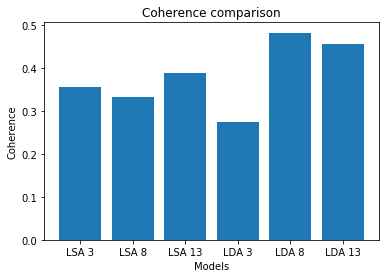

In [46]:
model_list = ['LSA 3', 'LSA 8', 'LSA 13', 'LDA 3', 'LDA 8', 'LDA 13']
coherence_list = [lsamodel_3_coherence, lsamodel_8_coherence, lsamodel_13_coherence, ldamodel_3_coherence, ldamodel_8_coherence, ldamodel_13_coherence]

create_histogram(coherence_list, model_list)

# Representação dos documentos

Função que corre os modelos, mostrando a Coherence e os gráficos associados, devolvendo um dicionário com os nomes dos tópicos calculados por modelo.

In [47]:
def run_models(reviews, approach):
    dictionary = corpora.Dictionary(reviews)
    doc_term_matrix = [dictionary.doc2bow(review) for review in reviews]
    
    print(approach)
    
    # LSA
    lsamodel = create_lsa(doc_term_matrix, dictionary, num_of_topics)
    lsa_topics = lsamodel.show_topics(num_topics=num_of_topics, num_words=num_of_words, formatted=False)
    lsa_topics_list = words_per_topic(lsa_topics)
    lsamodel_coherence = CoherenceModel(topics=lsa_topics_list, texts=reviews, dictionary=dictionary, coherence='c_v').get_coherence()
    print("\nLSA - Latent Semantic Indexing")
    print("Coherence: {}\n\n".format(lsamodel_coherence))
    lsa_topics_names = view_topics(lsa_topics)
    
    # LDA
    ldamodel = create_lda(doc_term_matrix, dictionary, num_of_topics)
    lda_topics = ldamodel.show_topics(num_topics=num_of_topics, num_words=num_of_words, formatted=False)
    lda_topics_list = words_per_topic(lda_topics)
    ldamodel_coherence = CoherenceModel(topics=lda_topics_list, texts=reviews, dictionary=dictionary, coherence='c_v').get_coherence()
    print("\nLDA - Latent Dirichlet Allocation")
    print("Coherence: {}\n\n".format(ldamodel_coherence))
    lda_topics_names = view_topics(lda_topics)
    
    # HDP
    hdpmodel = HdpModel(doc_term_matrix, dictionary)
    hdp_topics = hdpmodel.show_topics(num_topics=num_of_topics, num_words=num_of_words, formatted=False)
    hdp_topics_list = words_per_topic(hdp_topics)
    hdpmodel_coherence = CoherenceModel(topics=hdp_topics_list, texts=reviews, dictionary=dictionary, coherence='c_v').get_coherence()
    print("\nHDP - Hierarchical Dirichlet Process")
    print("Coherence: {}\n\n".format(hdpmodel_coherence))
    hdp_topics_names = view_topics(hdp_topics)
    
    topics_names_dictionary = {'lsa':lsa_topics_names, 'lda':lda_topics_names, 'hdp':hdp_topics_names}
    
    model_list = ['LSA', 'LDA', 'HDP']
    coherence_list = [lsamodel_coherence, ldamodel_coherence, hdpmodel_coherence]

    create_histogram(coherence_list, model_list)
    
    return topics_names_dictionary

### Com Minúsculas

Com Minúsculas

LSA - Latent Semantic Indexing
Coherence: 0.3331597250608737


Topico: Computers -> Palavras e pesos = 'like':0.24050330304073622, 'car':0.22523068192709944, 'also':0.17604839198132463, 'would':0.15927952811458412, 'get':0.15250132288334245, 'even':0.12919452742381451, 'imac':0.12074243054023774, 'good':0.12040656509995339, 'much':0.11944498546005405, 'well':0.11853600133093346, 'time':0.11477779602391196, 'dell':0.10632872665271839, 'new':0.10428216247735035, 'really':0.10336728561536893, 'system':0.10286120249773892

Topico: Computers -> Palavras e pesos = 'car':-0.43598775801639245, 'imac':0.2637802433881096, 'dell':0.21314932053939217, 'mac':0.2094938928597547, 'pc':0.18138904594820782, 'apple':0.17012005666653138, 'computer':0.13950734580495697, 'rear':-0.11256161915378761, 'photos':0.10911553611099298, 'applications':0.10516372758994978, 'seat':-0.10499142113748018, 'mail':0.10157205667816496, 'iphoto':0.10002285446890376, 'mouse':0.09773901582308522, 'engine':-0.

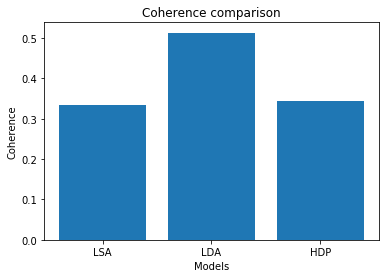

In [48]:
train_list_lowercase = [data_treatment(review, True, False, False, False).split() for review in reviews[10:]]
lowercase_dictionary = run_models(train_list_lowercase, "Com Minúsculas")

### Com Minúsculas e Lemmatization

Com Minúsculas e Lemmatization

LSA - Latent Semantic Indexing
Coherence: 0.3213166835808643


Topico: Computers -> Palavras e pesos = 'car':0.2536618920881417, 'like':0.22717661278174298, 'get':0.16357729224495077, 'also':0.16035865938552687, 'would':0.1456599047628691, 'time':0.1327692517743479, 'make':0.12492952833931814, 'even':0.12086888732979909, 'good':0.11197705039728956, 'well':0.11076901884734838, 'much':0.10974732889870106, 'system':0.10631837818243967, 'imac':0.10590353366973913, 'really':0.09504938135581846, 'dell':0.09500041382279983

Topico: Computers -> Palavras e pesos = 'car':-0.5356372532712458, 'imac':0.21890731634776842, 'seat':-0.1907316144368984, 'mac':0.19059631227215837, 'dell':0.16839873612793682, 'pc':0.15613086073397864, 'apple':0.14588886462164755, 'computer':0.12856601091497086, 'application':0.12105834843012522, 'rear':-0.11695925711980977, 'photo':0.11658567611484943, 'engine':-0.10735937890206249, 'wheel':-0.0991646151216227, 'driver':-0.087447015358175

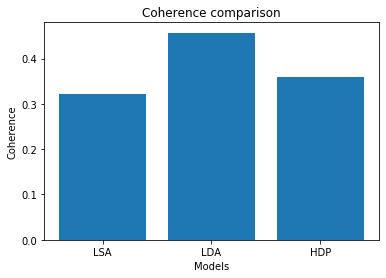

In [49]:
train_list_lowercase_lemmatization = [data_treatment(review, True, True, False, False).split() for review in reviews[10:]]
lowercase_lemmatization_dictionary = run_models(train_list_lowercase_lemmatization, "Com Minúsculas e Lemmatization")

### Com Minúsculas e POS tagging

Com Minúsculas e POS tagging

LSA - Latent Semantic Indexing
Coherence: 0.3320225779619731


Topico: Computers -> Palavras e pesos = 'car':-0.4795222333650151, 'system':-0.20669453354903083, 'time':-0.17403554265381377, 'dell':-0.1546170105693713, 'computer':-0.1528429620897479, 'apple':-0.1387523365974854, 'cd':-0.1371985035771246, 'way':-0.12263752691071055, 'pc':-0.11700566264158066, 'power':-0.11377467106806151, 'drive':-0.11125214066366979, 'performance':-0.1038667663623863, 'engine':-0.09788819872240467, 'use':-0.09450640961858958, 'seat':-0.09363952772084787

Topico: Computers -> Palavras e pesos = 'car':0.5955604651062366, 'apple':-0.2044709326340952, 'dell':-0.20032406711350187, 'pc':-0.18189395859117208, 'computer':-0.18017814108392435, 'imac':-0.13977386886504156, 'mac':-0.12324569484284743, 'engine':0.1209242055819099, 'seat':0.11935252860860024, 'applications':-0.11403072713245446, 'photos':-0.1124820455610521, 'software':-0.11141340116936489, 'system':-0.10566858038409065

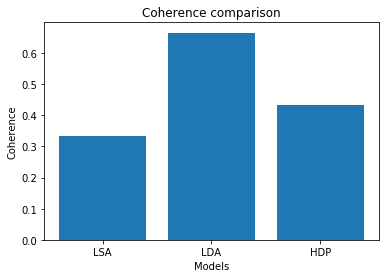

In [50]:
train_list_lowercase_pos = [data_treatment(review, True, False, True, False).split() for review in reviews[10:]]
lowercase_pos_dictionary = run_models(train_list_lowercase_pos, "Com Minúsculas e POS tagging")

### Com Minúsculas e Chunking

Com Minúsculas e Chunking

LSA - Latent Semantic Indexing
Coherence: 0.4181568213964287


Topico: Computers -> Palavras e pesos = 'car':0.35496831477905155, 'dell':0.18809335965413196, 'system':0.1802832171943024, 'imac':0.14662113421522643, 'new':0.13556764023164852, 'computer':0.13459601648958253, 'mac':0.12488918613869124, 'apple':0.12006776827751851, 'good':0.11972760681623082, 'pc':0.11885130497752044, 'time':0.11884874574969953, 'cd':0.11680739422447368, 'drive':0.1123048529319075, 'much':0.1116554307830666, 'many':0.10156500363376517

Topico: Computers -> Palavras e pesos = 'car':0.533206495823778, 'dell':-0.23191520290691453, 'imac':-0.21266775807246752, 'mac':-0.18988262619421725, 'pc':-0.17641642522476192, 'apple':-0.15994100819153986, 'computer':-0.1499576490628222, 'rear':0.13020792111905977, 'seat':0.12745658170083576, 'engine':0.1159467988221622, 'photos':-0.10425861801784352, 'applications':-0.1035742047404594, 'mouse':-0.09942982506048711, 'software':-0.0955316581246694

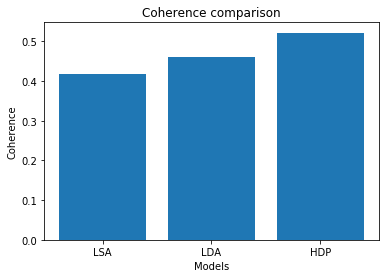

In [51]:
train_list_lowercase_chunking = [data_treatment(review, True, False, False, True).split() for review in reviews[10:]]
lowercase_chunking_dictionary = run_models(train_list_lowercase_chunking, "Com Minúsculas e Chunking")

### Com Minúsculas Lemmatization e Chunking

Com Minúsculas, Lemmatization e Chunking

LSA - Latent Semantic Indexing
Coherence: 0.3324099130047786


Topico: Computers -> Palavras e pesos = 'car':-0.39069404470675956, 'system':-0.17503650059260625, 'dell':-0.16117731343221844, 'imac':-0.13447844220839092, 'time':-0.13298976361125245, 'computer':-0.12954983981407955, 'seat':-0.12783257278336438, 'new':-0.1211592128641634, 'mac':-0.12107131243497171, 'cd':-0.11713814081278748, 'drive':-0.11347347307543221, 'thing':-0.11260239156438431, 'good':-0.11161615099319898, 'apple':-0.1084051733083435, 'much':-0.09812896167194433

Topico: Computers -> Palavras e pesos = 'car':-0.5506021530087738, 'dell':0.21725431516370902, 'imac':0.21499181828701655, 'mac':0.20095966117929598, 'seat':-0.18519450159532444, 'pc':0.15859020141581354, 'apple':0.1573481730465861, 'computer':0.15476510231839202, 'application':0.1264421320395986, 'engine':-0.11439119865955136, 'rear':-0.11270888106748618, 'photo':0.1082774372406959, 'wheel':-0.09855774811178711, '

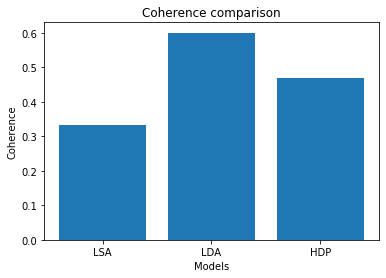

In [52]:
train_list_lowercase_lemmatization_chunking = [data_treatment(review, True, True, False, True).split() for review in reviews[10:]]
lowercase_lemmatization_chunking_dictionary = run_models(train_list_lowercase_lemmatization_chunking, "Com Minúsculas, Lemmatization e Chunking")

### Com Minúsculas POS e Chunking

Com Minúsculas, POS e Chunking

LSA - Latent Semantic Indexing
Coherence: 0.36247402410407464


Topico: Cars -> Palavras e pesos = 'car':0.5419413655329417, 'system':0.23288165618882214, 'computer':0.15483886826436077, 'dell':0.15026599390585382, 'time':0.14358761753125993, 'cd':0.14358585655347092, 'apple':0.13392807309612387, 'power':0.12125315892470417, 'pc':0.11694626472871641, 'engine':0.11364838520193787, 'performance':0.10853775631524826, 'drive':0.10706436799373165, 'cars':0.09579224553218271, 'seat':0.0935347584928754, 'room':0.08932945661966696

Topico: Computers -> Palavras e pesos = 'car':-0.5782173763344238, 'apple':0.21367629720759243, 'computer':0.20986568410375048, 'dell':0.20959380826735904, 'pc':0.1982504755638439, 'system':0.15052651634809805, 'imac':0.1489304248040748, 'software':0.12790345097756017, 'applications':0.12374489912787319, 'engine':-0.11871518286481182, 'mac':0.1131171172979721, 'photos':0.10815885272371786, 'service':0.10206437995725846, 'seat':-0.1015

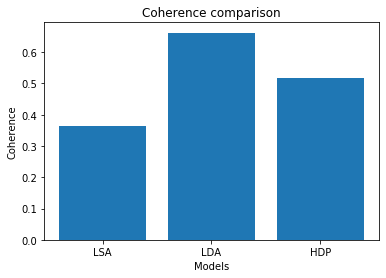

In [53]:
train_list_lowercase_pos_chunking = [data_treatment(review, True, False, True, True).split() for review in reviews[10:]]
lowercase_pos_chunking_dictionary = run_models(train_list_lowercase_pos_chunking, "Com Minúsculas, POS e Chunking")

### Com Minúsculas Lemmatization, POS e Chunking

Com Minúsculas, Lemmatization, POS e Chunking

LSA - Latent Semantic Indexing
Coherence: 0.3483142282085022


Topico: Cars -> Palavras e pesos = 'car':0.5258580427605867, 'system':0.21511120832803482, 'dell':0.15786394053355843, 'seat':0.15551734842905468, 'time':0.15308169653937068, 'computer':0.14528840157607403, 'cd':0.14101402044478945, 'thing':0.12409114031428825, 'apple':0.11855618695199015, 'drive':0.11196995394267482, 'power':0.10446296954835158, 'engine':0.10284302059590725, 'pc':0.10128066550693778, 'room':0.09889525483018964, 'imac':0.09575712608340378

Topico: Computers -> Palavras e pesos = 'car':0.5802549216650253, 'dell':-0.23006402046478555, 'computer':-0.1900045184773436, 'apple':-0.18721062875789546, 'seat':0.1767917918944849, 'pc':-0.17161429042774018, 'imac':-0.1636119578721153, 'mac':-0.15337339259110755, 'application':-0.14112713679163694, 'system':-0.13980261732873478, 'engine':0.11771893583920072, 'service':-0.11708264117906686, 'photo':-0.11099440609274193, 'ma

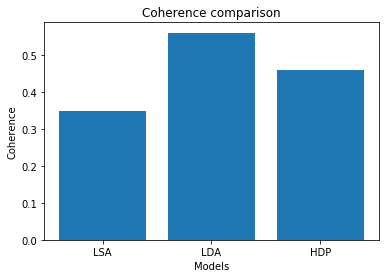

In [54]:
train_list_lowercase_lemmatization_pos_chunking = [data_treatment(review, True, True, True, True).split() for review in reviews[10:]]
lowercase_lemmatization_pos_chunking_dictionary = run_models(train_list_lowercase_lemmatization_pos_chunking, "Com Minúsculas, Lemmatization, POS e Chunking")

# Número ideal de tópicos

Funções para descobrir qual é o número ideal de tópicos por modelo.

Aplicação do tratamento com POS tagging porque é o que apresenta melhores resultados.

In [55]:
def compute_coherence_values(model_type, dictionary, doc_term_matrix, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        if model_type == 'lsa':
            lsamodel = create_lsa(doc_term_matrix, dictionary, num_topics)
            model_topics = lsamodel.show_topics(num_topics=num_topics, num_words=num_of_words, formatted=False)
        if model_type == 'lda':
            ldamodel = create_lda(doc_term_matrix, dictionary, num_topics)
            model_topics = ldamodel.show_topics(num_topics=num_topics, num_words=num_of_words, formatted=False)
        if model_type == 'hdp':
            hdpmodel = HdpModel(doc_term_matrix, dictionary)
            model_topics = hdpmodel.show_topics(num_topics=num_topics, num_words=num_of_words, formatted=False)
        model_list.append(model)
        topics_list = []
        for topicid, topic in model_topics:
            words_per_topic = []
            for word, weight in topic:
                words_per_topic.append(word)
            topics_list.append(words_per_topic)
        coherencemodel = CoherenceModel(model=model, topics=topics_list, texts=train_list, dictionary=dictionary, coherence='c_v').get_coherence()
        coherence_values.append(coherencemodel)

    return model_list, coherence_values


def optimal_number_of_topics(coherence_values, model):
    limit=40; start=2; step=6;
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.title(model)
    plt.show()
    
    for m, cv in zip(x, coherence_values):
        print("Numero de Topicos {} tem Coherence: {}".format(m, round(cv, 4)))

### LSA

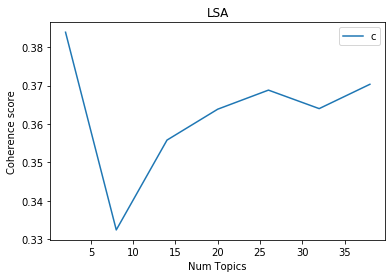

Numero de Topicos 2 tem Coherence: 0.3839
Numero de Topicos 8 tem Coherence: 0.3324
Numero de Topicos 14 tem Coherence: 0.3558
Numero de Topicos 20 tem Coherence: 0.3638
Numero de Topicos 26 tem Coherence: 0.3688
Numero de Topicos 32 tem Coherence: 0.364
Numero de Topicos 38 tem Coherence: 0.3703


In [56]:
model = 'LSA'
dictionary = corpora.Dictionary(train_list_lowercase_pos)
doc_term_matrix = [dictionary.doc2bow(review) for review in train_list_lowercase_pos]
model_list, coherence_values = compute_coherence_values(model.lower(), dictionary=dictionary, doc_term_matrix=doc_term_matrix, texts=train_list, start=2, limit=40, step=6)
optimal_number_of_topics(coherence_values, model)

In [57]:
lsamodel = create_lsa(doc_term_matrix, dictionary, 2)
lsa_topics = lsamodel.show_topics(num_topics=2, num_words=num_of_words, formatted=False)
view_topics(lsa_topics)

Topico: Computers -> Palavras e pesos = 'car':-0.4795226491331276, 'system':-0.20669554744183055, 'time':-0.17403809956526217, 'dell':-0.15461680302760555, 'computer':-0.1528411397455791, 'apple':-0.13875478478105338, 'cd':-0.13719678060205198, 'way':-0.12263749281554391, 'pc':-0.11700525586450708, 'power':-0.11377537853817997, 'drive':-0.11125307729191966, 'performance':-0.10386340425166084, 'engine':-0.09789165825821296, 'use':-0.09450341695548924, 'seat':-0.09363768980410193

Topico: Computers -> Palavras e pesos = 'car':-0.5955613401750288, 'apple':0.2044653536452867, 'dell':0.20032660396978524, 'pc':0.1818880747208879, 'computer':0.18017982277802458, 'imac':0.13977345523626625, 'mac':0.12324516241261925, 'engine':-0.12092631092912487, 'seat':-0.11934857474212711, 'applications':0.11403234827863686, 'photos':0.11248338542524842, 'software':0.11141020503920851, 'system':0.10566390054536137, 'mail':0.10549887722756894, 'cars':-0.10333645431120153



['Computers', 'Computers']

### LDA

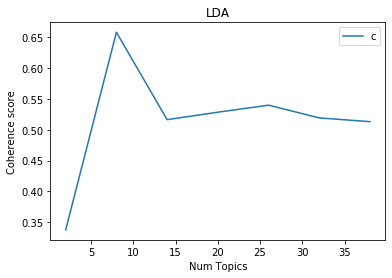

Numero de Topicos 2 tem Coherence: 0.3375
Numero de Topicos 8 tem Coherence: 0.6583
Numero de Topicos 14 tem Coherence: 0.5165
Numero de Topicos 20 tem Coherence: 0.5285
Numero de Topicos 26 tem Coherence: 0.54
Numero de Topicos 32 tem Coherence: 0.5192
Numero de Topicos 38 tem Coherence: 0.5132


In [58]:
model = 'LDA'
dictionary = corpora.Dictionary(train_list_lowercase_pos)
doc_term_matrix = [dictionary.doc2bow(review) for review in train_list_lowercase_pos]
model_list, coherence_values = compute_coherence_values(model.lower(), dictionary=dictionary, doc_term_matrix=doc_term_matrix, texts=train_list, start=2, limit=40, step=6)
optimal_number_of_topics(coherence_values, model)

In [59]:
ldamodel = create_lda(doc_term_matrix, dictionary, 8)
lda_topics = ldamodel.show_topics(num_topics=8, num_words=num_of_words, formatted=False)
view_topics(lda_topics)

Topico: Cars -> Palavras e pesos = 'car':0.041239176, 'engine':0.010964752, 'cars':0.008893853, 'power':0.008667268, 'seat':0.008132251, 'seats':0.0077452115, 'vehicle':0.0064213076, 'ford':0.00617609, 'road':0.0061694887, 'focus':0.0054155164, 'wheel':0.005123854, 'taurus':0.0050483225, 'system':0.0048553697, 'time':0.004824227, 'speed':0.004720678

Topico: Books -> Palavras e pesos = 'book':0.031440724, 'story':0.012767965, 'time':0.012019152, 'resort':0.008322481, 'books':0.0072577465, 'grisham':0.0071336925, 'family':0.00700472, 'disney':0.0061073466, 'cotton':0.005135981, 'character':0.004958463, 'rooms':0.004900704, 'plot':0.0048716348, 'world':0.004802306, 'room':0.004783183, 'beach':0.004729179

Topico: Music -> Palavras e pesos = 'song':0.010622037, 'time':0.009166695, 'phone':0.0069986116, 'hotel':0.0068597533, 'island':0.0063517233, 'songs':0.0062277205, 'room':0.005716165, 'rap':0.0056520165, 'cd':0.0054927003, 'cam':0.005300447, 'club':0.0045411834, 'treasure':0.0043430943

['Cars', 'Books', 'Music', 'Hotels', 'Movies', 'Music', 'Computers', 'Phones']

### HDP

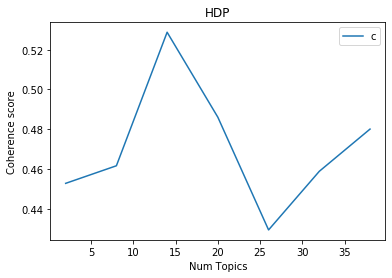

Numero de Topicos 2 tem Coherence: 0.4528
Numero de Topicos 8 tem Coherence: 0.4617
Numero de Topicos 14 tem Coherence: 0.5288
Numero de Topicos 20 tem Coherence: 0.4861
Numero de Topicos 26 tem Coherence: 0.4294
Numero de Topicos 32 tem Coherence: 0.4589
Numero de Topicos 38 tem Coherence: 0.4801


In [60]:
model = 'HDP'
dictionary = corpora.Dictionary(train_list_lowercase_pos)
doc_term_matrix = [dictionary.doc2bow(review) for review in train_list_lowercase_pos]
model_list, coherence_values = compute_coherence_values(model.lower(), dictionary=dictionary, doc_term_matrix=doc_term_matrix, texts=train_list, start=2, limit=40, step=6)
optimal_number_of_topics(coherence_values, model)

In [73]:
hdpmodel = HdpModel(doc_term_matrix, dictionary)
model_topics = hdpmodel.show_topics(num_topics=14, num_words=num_of_words, formatted=False)
view_topics(model_topics)

Topico: Music -> Palavras e pesos = 'time':0.004864555437659826, 'song':0.004857055287348898, 'track':0.004054678582860521, 'system':0.003819816890055581, 'dell':0.0037572502822938586, 'beat':0.003565703206503349, 'lyrics':0.003278792081371334, 'story':0.0029038911285578853, 'something':0.0024493923512440693, 'cookware':0.002361756796195694, 'use':0.0023346182978300446, 'chorus':0.0022466772022904573, 'movie':0.0021707845285119233, 'way':0.0021491090773650945, 'pans':0.0021125666232719126

Topico: Hotels -> Palavras e pesos = 'resort':0.00463132379963495, 'time':0.004391242478642095, 'room':0.004160100930892722, 'dell':0.0027668450767007837, 'computer':0.002718652523936307, 'disney':0.002708567891540689, 'day':0.0026335729408258537, 'car':0.0025699513178393412, 'rooms':0.0024472048376154246, 'people':0.0023661331666094748, 'service':0.0022740969558429965, 'system':0.002087976356358617, 'tea':0.0020849485038994258, 'year':0.0020218547664561768, 'world':0.001974462822222209

Topico: Cars

['Music',
 'Hotels',
 'Cars',
 'Computers',
 'Cookware',
 'Cars',
 'Cars',
 'Computers',
 'Phones',
 'Hotels',
 'Phones',
 'Cars',
 'Computers',
 'Movies']

# Inferência

Categorização original dos 10 documentos de inferência.
Esta categorização foi realizada manualmente, lendo cada uma das reviews.

In [61]:
data = {'Documento':[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'Tópico':['Books', 'Phones', 'Movies', 'Music', 'Books', 'Music', 'Computers', 'Music', 'Books', 'Music']} 
df = pd.DataFrame(data)
df

,Documento,Tópico
0,0,Books
1,1,Phones
2,2,Movies
3,3,Music
4,4,Books
5,5,Music
6,6,Computers
7,7,Music
8,8,Books
9,9,Music


Lista com os 10 documentos de inferência refletidos acima.

In [62]:
real_topics = ['Books', 'Phones', 'Movies', 'Music', 'Books', 'Music', 'Computers', 'Music', 'Books', 'Music']

Função que cria um dicionário com o nome do modelo como key e uma lista com o id dos tópicos com respectivo peso como value.

In [63]:
def get_inference_dictionary(test_list, lsamodel, ldamodel, hdpmodel, dictionary):
    inference_list_lsa = []
    inference_list_lda = []
    inference_list_hdp = []
    inference_dictionary = {}
    for review in test_list:
        inference_list_lsa.append(lsamodel[dictionary.doc2bow(review)])
    inference_dictionary.update({'lsa':inference_list_lsa})
    for review in test_list:
        inference_list_lda.append(ldamodel[dictionary.doc2bow(review)])
    inference_dictionary.update({'lda':inference_list_lda})
    for review in test_list:
        inference_list_hdp.append(hdpmodel[dictionary.doc2bow(review)])
    inference_dictionary.update({'hdp':inference_list_hdp})

    return inference_dictionary

Função que vai tentar preditar corretamente qual o nome do tópico para cada um dos 10 últimos reviews do conjunto de dados por modelo.
Baseia-se no dicionário de treino já calculado acima que tem os tópicos que o modelo considerou, dependendo da abordagem utilizada, e baseia-se também num dicionário de teste/inferência, que contém o id do tópico e um peso.
Percorre o dicionário de teste/inferência e procura pelo id do tópico que tem maior peso, de seguida pesquisa no dicionário de treino por esse mesmo id e devolve o nome do tópico.
Pelo meio filtra o dicionário de teste/inferência por id <= 7 porque existem ids com valor maior que 7 e no nosso caso só temos 8 tópicos.
Calcula para cada um dos modelos.

In [94]:
def results(inference_dictionary, train_dictionary, approach):
    models = ['lsa', 'lda', 'hdp']
    result_lsa = 0
    result_lda = 0
    result_hdp = 0
    print("\n{}\n".format(approach))
    for model in models:
        inference_list = inference_dictionary[model]
        number_review = 0
        print("\nModelo: {}".format(model.upper()))
        
        reviews_cleaned = []
        for review in inference_list:
            review = [(i[0], abs(i[1])) for i in review if i[0] <= 7]
            reviews_cleaned.append(review)
        
        count_predict = 0
        for review in reviews_cleaned:
            id_topic = max(review, key=itemgetter(1))[0]
            predict_name = train_dictionary[model][id_topic]
            predict_name_list = predict_name.split(",")
            real_name = real_topics[number_review]
            print("\n\tReview número {}:".format(number_review))
            print("\t\tTópico real = {} \n\t\tTópico predicto = {}".format(real_name, predict_name))
            number_review += 1
            
            for predict_name in predict_name_list:
                if predict_name == real_name:
                    count_predict += 1
                if model == 'lsa':
                    result_lsa = count_predict
                if model == 'lda':
                    result_lda = count_predict
                if model == 'hdp':
                    result_hdp = count_predict
            
    print("\nResultados:")
    print("\tLSA = {}/10".format(result_lsa))
    print("\tLDA = {}/10".format(result_lda))
    print("\tHDP = {}/10".format(result_hdp))

## Inferência com Minúsculas

In [96]:
dictionary = corpora.Dictionary(train_list_lowercase)
doc_term_matrix = [dictionary.doc2bow(review) for review in train_list_lowercase]

lsamodel = create_lsa(doc_term_matrix, dictionary, num_of_topics)
ldamodel = create_lda(doc_term_matrix, dictionary, num_of_topics)
hdpmodel = HdpModel(doc_term_matrix, dictionary)

lowercase_test_list = [data_treatment(review, True, False, False, False).split() for review in reviews[:10]]
inference_dictionary = get_inference_dictionary(lowercase_test_list, lsamodel, ldamodel, hdpmodel, dictionary)

results(inference_dictionary, lowercase_dictionary, "Inferência com Minúsculas")


Inferência com Minúsculas


Modelo: LSA

	Review número 0:
		Tópico real = Books 
		Tópico predicto = Computers

	Review número 1:
		Tópico real = Phones 
		Tópico predicto = Phones

	Review número 2:
		Tópico real = Movies 
		Tópico predicto = Computers

	Review número 3:
		Tópico real = Music 
		Tópico predicto = Music

	Review número 4:
		Tópico real = Books 
		Tópico predicto = Computers

	Review número 5:
		Tópico real = Music 
		Tópico predicto = Music

	Review número 6:
		Tópico real = Computers 
		Tópico predicto = Computers

	Review número 7:
		Tópico real = Music 
		Tópico predicto = Computers

	Review número 8:
		Tópico real = Books 
		Tópico predicto = Computers

	Review número 9:
		Tópico real = Music 
		Tópico predicto = Music

Modelo: LDA

	Review número 0:
		Tópico real = Books 
		Tópico predicto = Movies

	Review número 1:
		Tópico real = Phones 
		Tópico predicto = Movies

	Review número 2:
		Tópico real = Movies 
		Tópico predicto = Movies

	Review número 3:
		Tópic

## Inferência com Minúsculas e Lemmatization

In [97]:
dictionary = corpora.Dictionary(train_list_lowercase_lemmatization)
doc_term_matrix = [dictionary.doc2bow(review) for review in train_list_lowercase_lemmatization]

lsamodel = create_lsa(doc_term_matrix, dictionary, num_of_topics)
ldamodel = create_lda(doc_term_matrix, dictionary, num_of_topics)
hdpmodel = HdpModel(doc_term_matrix, dictionary)

lowercase_lemmatization_test_list = [data_treatment(review, True, True, False, False).split() for review in reviews[:10]]
inference_dictionary = get_inference_dictionary(lowercase_lemmatization_test_list, lsamodel, ldamodel, hdpmodel, dictionary)

results(inference_dictionary, lowercase_lemmatization_dictionary, "Inferência com Minúsculas e Lemmatization")


Inferência com Minúsculas e Lemmatization


Modelo: LSA

	Review número 0:
		Tópico real = Books 
		Tópico predicto = Computers

	Review número 1:
		Tópico real = Phones 
		Tópico predicto = Phones

	Review número 2:
		Tópico real = Movies 
		Tópico predicto = Computers

	Review número 3:
		Tópico real = Music 
		Tópico predicto = Music

	Review número 4:
		Tópico real = Books 
		Tópico predicto = Computers

	Review número 5:
		Tópico real = Music 
		Tópico predicto = Music

	Review número 6:
		Tópico real = Computers 
		Tópico predicto = Computers

	Review número 7:
		Tópico real = Music 
		Tópico predicto = Computers

	Review número 8:
		Tópico real = Books 
		Tópico predicto = Computers

	Review número 9:
		Tópico real = Music 
		Tópico predicto = Music

Modelo: LDA

	Review número 0:
		Tópico real = Books 
		Tópico predicto = Computers

	Review número 1:
		Tópico real = Phones 
		Tópico predicto = Computers

	Review número 2:
		Tópico real = Movies 
		Tópico predicto = Computers



## Inferência com Minúsculas e POS

In [105]:
dictionary = corpora.Dictionary(train_list_lowercase_pos)
doc_term_matrix = [dictionary.doc2bow(review) for review in train_list_lowercase_pos]

lsamodel = create_lsa(doc_term_matrix, dictionary, num_of_topics)
ldamodel = create_lda(doc_term_matrix, dictionary, num_of_topics)
hdpmodel = HdpModel(doc_term_matrix, dictionary)

lowercase_pos_test_list = [data_treatment(review, True, False, True, False).split() for review in reviews[:10]]
inference_dictionary = get_inference_dictionary(lowercase_pos_test_list, lsamodel, ldamodel, hdpmodel, dictionary)

results(inference_dictionary, lowercase_pos_dictionary, "Inferência com Minúsculas e POS")


Inferência com Minúsculas e POS


Modelo: LSA

	Review número 0:
		Tópico real = Books 
		Tópico predicto = Movies

	Review número 1:
		Tópico real = Phones 
		Tópico predicto = Phones

	Review número 2:
		Tópico real = Movies 
		Tópico predicto = Movies

	Review número 3:
		Tópico real = Music 
		Tópico predicto = Music

	Review número 4:
		Tópico real = Books 
		Tópico predicto = Movies

	Review número 5:
		Tópico real = Music 
		Tópico predicto = Music

	Review número 6:
		Tópico real = Computers 
		Tópico predicto = Computers

	Review número 7:
		Tópico real = Music 
		Tópico predicto = Music

	Review número 8:
		Tópico real = Books 
		Tópico predicto = Movies

	Review número 9:
		Tópico real = Music 
		Tópico predicto = Music

Modelo: LDA

	Review número 0:
		Tópico real = Books 
		Tópico predicto = Cookware

	Review número 1:
		Tópico real = Phones 
		Tópico predicto = Hotels

	Review número 2:
		Tópico real = Movies 
		Tópico predicto = Cars

	Review número 3:
		Tópico real = M

## Inferência com Minúsculas e Chunking

In [108]:
dictionary = corpora.Dictionary(train_list_lowercase_chunking)
doc_term_matrix = [dictionary.doc2bow(review) for review in train_list_lowercase_chunking]

lsamodel = create_lsa(doc_term_matrix, dictionary, num_of_topics)
ldamodel = create_lda(doc_term_matrix, dictionary, num_of_topics)
hdpmodel = HdpModel(doc_term_matrix, dictionary)

lowercase_chunking_test_list = [data_treatment(review, True, False, False, True).split() for review in reviews[:10]]
inference_dictionary = get_inference_dictionary(lowercase_chunking_test_list, lsamodel, ldamodel, hdpmodel, dictionary)

results(inference_dictionary, lowercase_chunking_dictionary, "Inferência com Minúsculas e Chunking")


Inferência com Minúsculas e Chunking


Modelo: LSA

	Review número 0:
		Tópico real = Books 
		Tópico predicto = Movies

	Review número 1:
		Tópico real = Phones 
		Tópico predicto = Phones

	Review número 2:
		Tópico real = Movies 
		Tópico predicto = Movies

	Review número 3:
		Tópico real = Music 
		Tópico predicto = Music

	Review número 4:
		Tópico real = Books 
		Tópico predicto = Movies

	Review número 5:
		Tópico real = Music 
		Tópico predicto = Music

	Review número 6:
		Tópico real = Computers 
		Tópico predicto = Computers

	Review número 7:
		Tópico real = Music 
		Tópico predicto = Music

	Review número 8:
		Tópico real = Books 
		Tópico predicto = Movies

	Review número 9:
		Tópico real = Music 
		Tópico predicto = Music

Modelo: LDA

	Review número 0:
		Tópico real = Books 
		Tópico predicto = Cookware

	Review número 1:
		Tópico real = Phones 
		Tópico predicto = Cookware

	Review número 2:
		Tópico real = Movies 
		Tópico predicto = Cookware

	Review número 3:
		Tópi

## Inferência com Minúsculas, Lemmatization e Chunking

In [110]:
dictionary = corpora.Dictionary(train_list_lowercase_lemmatization_chunking)
doc_term_matrix = [dictionary.doc2bow(review) for review in train_list_lowercase_lemmatization_chunking]

lsamodel = create_lsa(doc_term_matrix, dictionary, num_of_topics)
ldamodel = create_lda(doc_term_matrix, dictionary, num_of_topics)
hdpmodel = HdpModel(doc_term_matrix, dictionary)

lowercase_lemmatization_chunking_test_list = [data_treatment(review, True, True, False, True).split() for review in reviews[:10]]
inference_dictionary = get_inference_dictionary(lowercase_lemmatization_chunking_test_list, lsamodel, ldamodel, hdpmodel, dictionary)

results(inference_dictionary, lowercase_lemmatization_chunking_dictionary, "Inferência com Minúsculas, Lemmatization e Chunking")


Inferência com Minúsculas, Lemmatization e Chunking


Modelo: LSA

	Review número 0:
		Tópico real = Books 
		Tópico predicto = Movies

	Review número 1:
		Tópico real = Phones 
		Tópico predicto = Phones

	Review número 2:
		Tópico real = Movies 
		Tópico predicto = Movies

	Review número 3:
		Tópico real = Music 
		Tópico predicto = Music

	Review número 4:
		Tópico real = Books 
		Tópico predicto = Movies

	Review número 5:
		Tópico real = Music 
		Tópico predicto = Music

	Review número 6:
		Tópico real = Computers 
		Tópico predicto = Computers

	Review número 7:
		Tópico real = Music 
		Tópico predicto = Computers

	Review número 8:
		Tópico real = Books 
		Tópico predicto = Movies

	Review número 9:
		Tópico real = Music 
		Tópico predicto = Music

Modelo: LDA

	Review número 0:
		Tópico real = Books 
		Tópico predicto = Music

	Review número 1:
		Tópico real = Phones 
		Tópico predicto = Cars

	Review número 2:
		Tópico real = Movies 
		Tópico predicto = Phones

	Review número

## Inferência com Minúsculas, POS e Chunking

In [112]:
dictionary = corpora.Dictionary(train_list_lowercase_pos_chunking)
doc_term_matrix = [dictionary.doc2bow(review) for review in train_list_lowercase_pos_chunking]

lsamodel = create_lsa(doc_term_matrix, dictionary, num_of_topics)
ldamodel = create_lda(doc_term_matrix, dictionary, num_of_topics)
hdpmodel = HdpModel(doc_term_matrix, dictionary)

lowercase_pos_chunking_test_list = [data_treatment(review, True, False, True, True).split() for review in reviews[:10]]
inference_dictionary = get_inference_dictionary(lowercase_pos_chunking_test_list, lsamodel, ldamodel, hdpmodel, dictionary)

results(inference_dictionary, lowercase_pos_chunking_dictionary, "Inferência com Minúsculas, POS e Chunking")


Inferência com Minúsculas, POS e Chunking


Modelo: LSA

	Review número 0:
		Tópico real = Books 
		Tópico predicto = Movies

	Review número 1:
		Tópico real = Phones 
		Tópico predicto = Phones

	Review número 2:
		Tópico real = Movies 
		Tópico predicto = Movies

	Review número 3:
		Tópico real = Music 
		Tópico predicto = Computers

	Review número 4:
		Tópico real = Books 
		Tópico predicto = Movies

	Review número 5:
		Tópico real = Music 
		Tópico predicto = Computers

	Review número 6:
		Tópico real = Computers 
		Tópico predicto = Cars

	Review número 7:
		Tópico real = Music 
		Tópico predicto = Computers

	Review número 8:
		Tópico real = Books 
		Tópico predicto = Movies

	Review número 9:
		Tópico real = Music 
		Tópico predicto = Computers

Modelo: LDA

	Review número 0:
		Tópico real = Books 
		Tópico predicto = Music

	Review número 1:
		Tópico real = Phones 
		Tópico predicto = Cookware

	Review número 2:
		Tópico real = Movies 
		Tópico predicto = Music

	Review número

## Inferência Com Minúsculas, Lemmatization, POS e Chunking

In [114]:
dictionary = corpora.Dictionary(train_list_lowercase_lemmatization_pos_chunking)
doc_term_matrix = [dictionary.doc2bow(review) for review in train_list_lowercase_lemmatization_pos_chunking]

lsamodel = create_lsa(doc_term_matrix, dictionary, num_of_topics)
ldamodel = create_lda(doc_term_matrix, dictionary, num_of_topics)
hdpmodel = HdpModel(doc_term_matrix, dictionary)

lowercase_lemmatization_pos_chunking_test_list = [data_treatment(review, True, True, True, True).split() for review in reviews[:10]]
inference_dictionary = get_inference_dictionary(lowercase_lemmatization_pos_chunking_test_list, lsamodel, ldamodel, hdpmodel, dictionary)

results(inference_dictionary, lowercase_lemmatization_pos_chunking_dictionary, "Inferência com Minúsculas, Lemmatization, POS e Chunking")


Inferência com Minúsculas, Lemmatization, POS e Chunking


Modelo: LSA

	Review número 0:
		Tópico real = Books 
		Tópico predicto = Movies

	Review número 1:
		Tópico real = Phones 
		Tópico predicto = Phones

	Review número 2:
		Tópico real = Movies 
		Tópico predicto = Movies

	Review número 3:
		Tópico real = Music 
		Tópico predicto = Computers

	Review número 4:
		Tópico real = Books 
		Tópico predicto = Movies

	Review número 5:
		Tópico real = Music 
		Tópico predicto = Computers

	Review número 6:
		Tópico real = Computers 
		Tópico predicto = Cars

	Review número 7:
		Tópico real = Music 
		Tópico predicto = Cars

	Review número 8:
		Tópico real = Books 
		Tópico predicto = Movies

	Review número 9:
		Tópico real = Music 
		Tópico predicto = Computers

Modelo: LDA

	Review número 0:
		Tópico real = Books 
		Tópico predicto = Movies

	Review número 1:
		Tópico real = Phones 
		Tópico predicto = Phones

	Review número 2:
		Tópico real = Movies 
		Tópico predicto = Music

	Revi